In [ ]:
import numpy as np 
import matplotlib.pyplot as plt



def evalh(x): 
  assert type(x) is np.ndarray 
  assert len(x) == 2
  x1,x2 = x
  return np.array([[2 + 512*(12*x1**2 - 4*x2), -2048*x1],[-2048*x1,1024]])

def find_condition_number(A):
  assert type(A) is np.ndarray
  assert A.shape[0] == A.shape[1]
  vals = np.linalg.eigvals(A)
  return max(vals)/min(vals)  



In [ ]:
a = evalh(np.array([1,4]))

In [ ]:
find_condition_number(a)

-0.6671443595677136

##1)

As shown above, one of the eigenvalues of the hessian is negative at the point (1,4). Hence the hessian is not positive definite at all points. Hence we cannot define a matrix $D^k$

In [ ]:
def compute_D_k(x):
  assert type(x) is np.ndarray
  assert len(x) == 2
  #compute and return D_k
  return np.linalg.inv(evalh(x))

In [ ]:
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 

  return 512*np.power(x[1] - x[0]**2,2,dtype='float64') + (4-x[0])**2

def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
 
  return np.array([-2048*(x[1]-x[0]**2)*x[0]-2*(4-x[0]), 1024*(x[1]-x[0]**2)])  


In [ ]:
def compute_steplength_backtracking_scaled_direction(x, gradf, d, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(d) is np.ndarray and len(d) == 2 


  alp = alpha_start
  x = np.array(x,dtype='float64')
  while evalf(x - np.multiply(alp,d@gradf)) > evalf(x) - gamma*alp*np.matmul(gradf,d@gradf.T):
    alp *= rho
  return alp


  

In [ ]:
def find_minimizer_gdscaling(start_x, tol,alpha,rho,gamma):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  k = 0
  cond = [find_condition_number(evalh(x))]
  while np.linalg.norm(evalg(x)) > tol:
    D = compute_D_k(x)
    step = compute_steplength_backtracking_scaled_direction(x,evalg(x),D,alpha,rho,gamma)
    x =x - np.multiply(step,np.matmul(D,evalg(x)))
    cond.append(find_condition_number(evalh(x)))
    k+= 1
    if k%1000==0:
        print(f'Iteration:{k}, Minimizer:{x}, min value:{evalf(x)}, gradient norm:{np.linalg.norm(evalg(x))}')

    
  print(f'Iteration:{k}, Minimizer:{x}, min value:{evalf(x)}, gradient norm:{np.linalg.norm(evalg(x))}')
  return x,evalf(x),k,cond

In [ ]:
xi = np.array([8,8])
alpha=1
gamma=0.5
rho=0.5
tol = 1e-5

x1,fx1,k1,c1 = find_minimizer_gdscaling(xi,tol,alpha,rho,gamma)

Iteration:48, Minimizer:[ 4. 16.], min value:2.356430075812841e-25, gradient norm:3.0280618445835964e-11


## 3)
We can check the condition number of the hessian matrix itself( evaluated at the current value of the minimizer)

In [ ]:
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  
  #Complete the code 
  alp = alpha_start
  while evalf(x - np.multiply(alp,gradf)) > evalf(x) - gamma*alp*np.matmul(gradf,gradf.T):
    alp *= rho
  return alp  


def find_minimizer_gd(start_x, tol,alpha, rho, gamma):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  
  x= start_x
  k = 0
  cond = [find_condition_number(evalh(x))]

  while np.linalg.norm(evalg(x)) > tol: 
    step = compute_steplength_backtracking(x,evalg(x),alpha,rho,gamma)
    x =x- np.multiply(step,evalg(x))
    k += 1
    
    cond.append(find_condition_number(evalh(x)))

   


  print(f'Iteration:{k}, Minimizer:{x}, min value:{evalf(x)}, gradient norm:{np.linalg.norm(evalg(x))}')

  return x, evalf(x),k,cond    


In [ ]:

x2,fx2,k2,c2 = find_minimizer_gd(xi,tol,alpha,rho,gamma)

Iteration:902339, Minimizer:[ 3.99995978 15.99967826], min value:1.6173741774296086e-09, gradient norm:9.995349710146104e-06


##4)

In [ ]:
print(f'For backtracking with scaling, number of iterations needed is {k1}, minimizer is {x1} and min value is {fx1}.\nFor backtracking without scaling, number of iterations needed is {k2}, minimizer is {x2}, min function value is {fx2}')

For backtracking with scaling, number of iterations needed is 48, minimizer is [ 4. 16.] and min value is 2.356430075812841e-25.
For backtracking without scaling, number of iterations needed is 902339, minimizer is [ 3.99995978 15.99967826], min function value is 1.6173741774296086e-09


We see that the number of iterations with scaling is 0.005% of the number without scaling. Hence scaling and drastically speeded up the convergence. Also, the minimizer for the former is more accurate.

N.B Due to the large difference in scales, we have to plot each graph on 2 different figures

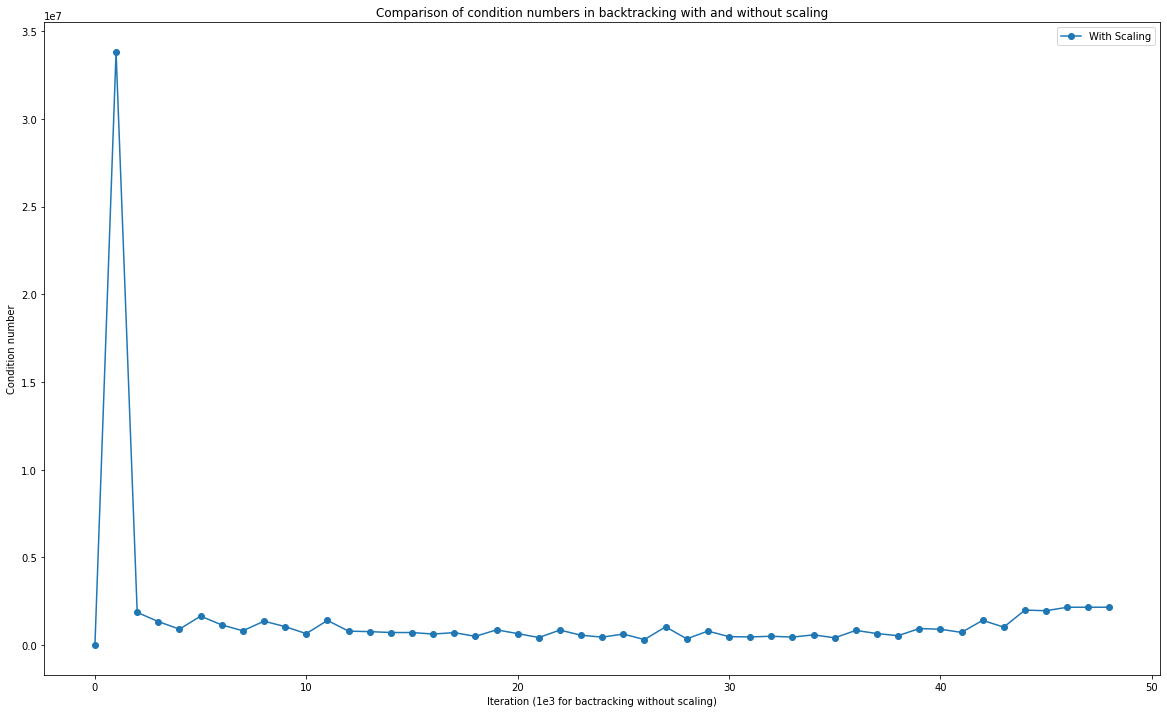

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(range(49),c1,marker='o',label='With Scaling')

plt.title('Comparison of condition number vs iteration for backtracking with scaling')
plt.xlabel('Iteration')
plt.ylabel('Condition number')
plt.legend()
plt.show()

Which the exception of 1 point, the condition numbers for each iteration in bactracking with scaling, are in the range [800000, 2160000]. There is no real trend to it, but they are more or less uniform.


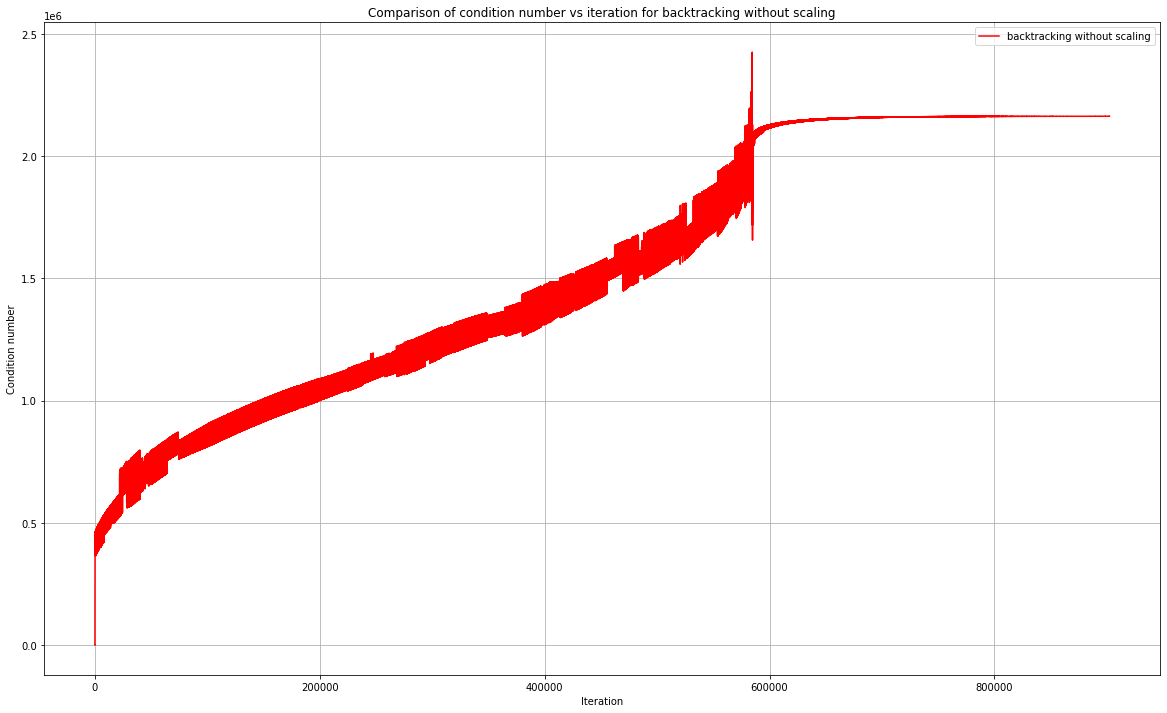

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(range(902340),c2,color='red',label='backtracking without scaling')
plt.title('Comparison of condition number vs iteration for backtracking without scaling')
plt.xlabel('Iteration')
plt.ylabel('Condition number')
plt.grid()
plt.legend()
plt.show()

For backtracking without scaling, we see a bit of an increasing trend .i.e the average condition number increases gradually, although there is still a fair bit of variability in each interval. However , in the last 30% of the iterations, the condition number is quite uniform with a value of around 2400000.

We can't really compare the 2 plots, due to the very huge difference in number of iterations. But we notice that the algorithms converged when the condition number started becoming uniform from  one iteration to the next.